<a href="https://colab.research.google.com/github/godlygodzilla/ai-4.0/blob/main/assignment5/sarima_sunspot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [4]:
data = pd.read_csv('/content/Sunspots.csv')

In [5]:
data.head(2)

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3


In [6]:
data.columns

Index(['Unnamed: 0', 'Date', 'Monthly Mean Total Sunspot Number'], dtype='object')

In [7]:
data.describe()

,Unnamed: 0,Monthly Mean Total Sunspot Number
count,3265.000000,3265.000000
mean,1632.000000,81.778775
std,942.668641,67.889277
min,0.000000,0.000000
25%,816.000000,23.900000
50%,1632.000000,67.200000
75%,2448.000000,122.500000
max,3264.000000,398.200000


In [8]:
data['Date']=pd.to_datetime(data['Date']) #Converting date into datetime object
data_new = data.set_index(data['Date']) #Setting the date column as index
data_new1 = data_new.drop(labels =['Date'],axis = 1) #Deleting the data column

<Axes: xlabel='Date'>

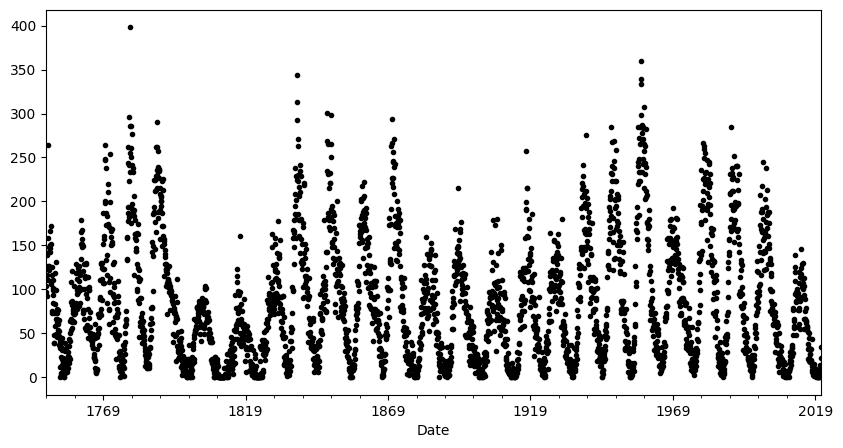

In [9]:
fig = plt.figure(figsize = (10,5))
data_new1['Monthly Mean Total Sunspot Number'].plot(style = 'k.')

<ipython-input-10-d85a8dc6f156>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_new1['2019'].resample('M').mean().plot(kind='bar')


<Axes: xlabel='Date'>

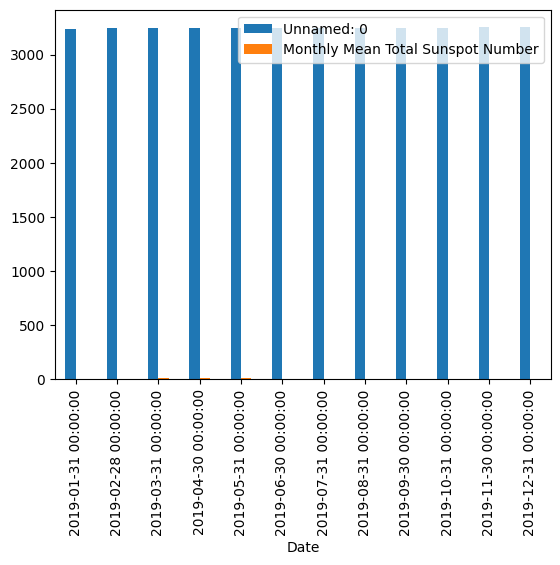

In [10]:
data_new1['2019'].resample('M').mean().plot(kind='bar')

In [11]:
data_q = data_new1.resample('q').mean()
data_q.head()

,Unnamed: 0,Monthly Mean Total Sunspot Number
Date,,
1749-03-31,1.0,105.900000
1749-06-30,4.0,124.566667
1749-09-30,7.0,131.666667
1749-12-31,10.0,177.366667
1750-03-31,13.0,132.466667


checking stationarity

In [23]:


def adfuller_test(data):

  if isinstance(data, pd.Series):
    data = data.values

  # Reshape the 2-dimensional array to a 1-dimensional array.
    data = data.reshape(-1)

  #Augmented Dickey-Fuller test.
    result = adfuller(data)

    labels = ['ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
      print(label + ':' + str(value))

  # Interpret the results.
    if result[1] <= 0.05:
      print("Data is stationary")
    else:
      print("Data is non-stationary ")

In [24]:
adfuller_test(data_q)

<Axes: xlabel='Date'>

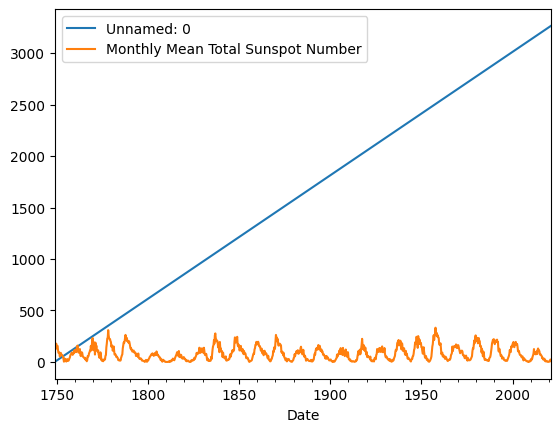

In [25]:
data_q.plot()

sarima


In [26]:
model=sm.tsa.statespace.SARIMAX(data_q['Monthly Mean Total Sunspot Number'],order=(2, 0, 2),seasonal_order=(2,0,2,6)) #seasonal_order is (p,d,q,seasonal_value) In this case I'm considering it as 6
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                 1089
Model:                 SARIMAX(2, 0, 2)x(2, 0, 2, 6)   Log Likelihood               -4955.663
Date:                               Sun, 15 Oct 2023   AIC                           9929.326
Time:                                       16:49:39   BIC                           9974.264
Sample:                                   03-31-1749   HQIC                          9946.335
                                        - 03-31-2021                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7877      0.080     22.223      0.000       1.630       1.945
ar.L2         -0.7896      0.080     -9.819      0.000      -0.947      -0.632
ma.L1         -1.1040      0.078    -14.197      0.000      -1.256      -0.952
ma.L2          0.3285      0.025     13.112      0.000       0.279       0.378
ar.S.L6        1.2686      0.034     37.186      0.000       1.202       1.335
ar.S.L12      -0.9246      0.034    -26.851      0.000      -0.992      -0.857
ma.S.L6       -1.2738      0.043    -29.677      0.000      -1.358      -1.190
ma.S.L12       0.8730      0.043     20.136      0.000       0.788       0.958
sigma2       514.1053     16.147     31.838      0.000     482.457     545.754
===================================================================================
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):               134.55
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.12
Prob(H) (two-sided):                  0.62   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

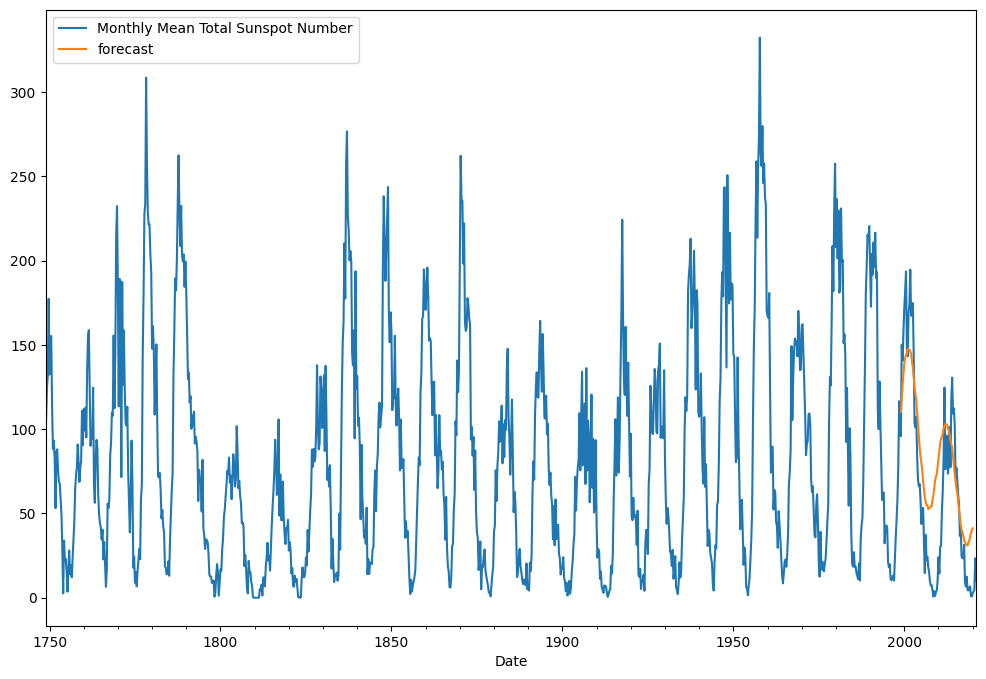

In [28]:
data_q['forecast']=results.predict(start=1000,end=1084,dynamic=True)
data_q[['Monthly Mean Total Sunspot Number','forecast']].plot(figsize=(12,8))

<Axes: xlabel='Date'>

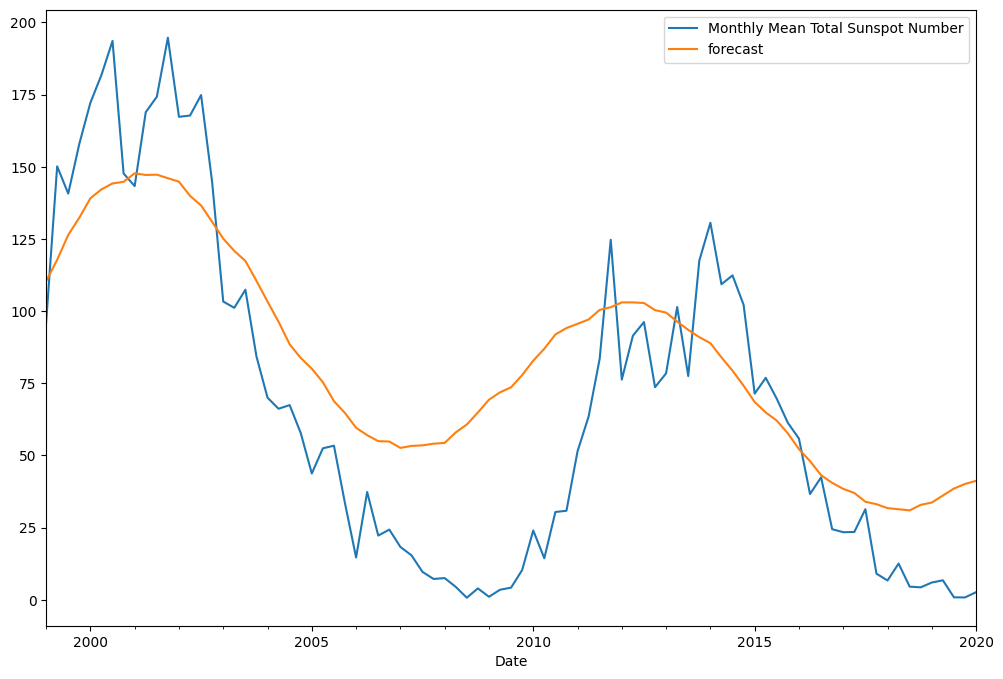

In [29]:
pred = data_q[data_q.forecast.notna()]
pred[['Monthly Mean Total Sunspot Number','forecast']].plot(figsize=(12,8))